In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256 
BATCH_SIZE = 32   

In [5]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    "potato_datasets", 
    shuffle=True, 
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    )

Found 2152 files belonging to 3 classes.


In [7]:
categories = datasets.class_names
categories

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

2024-08-10 01:47:38.407750: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


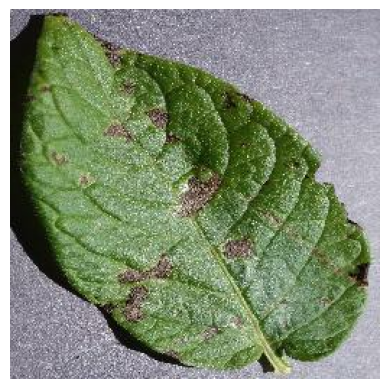

In [18]:
for image_batch, label_batch in datasets.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")


In [19]:
train_size = 0.8
val_size = 0.1

In [21]:
train_ds = datasets.take(int(len(datasets)*train_size))
test_ds = datasets.skip(int(len(datasets)*train_size))
val_ds = test_ds.take(int(len(datasets)*val_size))

In [24]:
#caching the training dataset and prefetching the CPU/GPU for optimization
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [31]:
#creating a layer to rescale, resize, rotate the images to improve its accuracy
resize_and_rescale= tf.keras.Sequential([
layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
layers.Rescaling(1.0/255)])

data_augment = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])